# Purchased

In [ ]:
options("scipen"=100, "digits"=4)

if(!require("rpart")) install.packages("rpart")
if(!require("rpart.plot")) install.packages("rpart.plot")
if(!require("Metrics")) install.packages("Metrics")

library("rpart")
library("rpart.plot")
library("Metrics")

## The Training Data

So here is the data we have, this will be our training data:

-   `Purchased` is our result or outcome
-   `Salary`, `Age` are the predictors

This data is about what kinds of customers responded to an email add
offering a special deal on a product. Were they high salary or low
salary and what about their age? We would like to know if `Salary` and
`Age` of the customer help us predict whether they bought an item based
on the offer they got.

Here is our training set:

| Salary | Age | Purchased |
|--------|-----|-----------|
| 53700  | 41  | no        |
| 65300  | 37  | no        |
| 48900  | 45  | yes       |
| 64800  | 49  | yes       |
| 69200  | 30  | yes       |
| 55900  | 57  | yes       |
| 48600  | 26  | no        |
| 72000  | 60  | yes       |
| 45300  | 34  | no        |
| 69000  | 32  | yes       |
| 73200  | 52  | yes       |

Lets read it in:

In [ ]:
url<- "https://docs.google.com/spreadsheets/d/e/2PACX-1vTx21HIv4xKL2c94OLQzMiNPmv5YXw-vAy3dRBL0gnknSMKMK4Ur_4nYGGyDtvS20iU3_r-_zZfQQmj/pub?gid=0&single=true&output=csv"
train<-read.csv(url)
str(train)

'data.frame':   11 obs. of  3 variables:
 $ Salary   : int  53700 65300 48900 64800 69200 55900 48600 72000 45300 69000 ...
 $ Age      : int  41 37 45 49 30 57 26 60 34 32 ...
 $ Purchased: chr  "no" "no" "yes" "yes" ...

## The Testing Data

Here we read the test set:

| Salary | Age | Purchased |
|--------|-----|-----------|
| 53900  | 45  | yes       |
| 64800  | 49  | yes       |
| 50000  | 32  | no        |
| 55900  | 57  | yes       |
| 55600  | 29  | no        |
| 60000  | 25  | no        |

In [ ]:
#read the testing set
url<- "https://docs.google.com/spreadsheets/d/e/2PACX-1vTx21HIv4xKL2c94OLQzMiNPmv5YXw-vAy3dRBL0gnknSMKMK4Ur_4nYGGyDtvS20iU3_r-_zZfQQmj/pub?gid=572053114&single=true&output=csv"
test<-read.csv(url)
str(test)

'data.frame':   8 obs. of  3 variables:
 $ Salary   : int  53900 64800 50000 55900 55600 60000 80000 66000
 $ Age      : int  45 49 32 57 29 25 30 62
 $ Purchased: chr  "yes" "yes" "no" "yes" ...

### Model Purchased\~Salary

#### Model With Training Data

We are going to model this situation with a decision tree. We will start
by just trying to use `Salary` to predict the result:

Lets look at the data sorted by Salary:

In [ ]:
print(train[order(train$Salary),])

   Salary Age Purchased
9   45300  34        no
7   48600  26        no
3   48900  45       yes
1   53700  41        no
6   55900  57       yes
4   64800  49       yes
2   65300  37        no
10  69000  32       yes
5   69200  30       yes
8   72000  60       yes
11  73200  52       yes

It appears that mostly those with higher salary purchased.

Lets look at the split on `Salary`

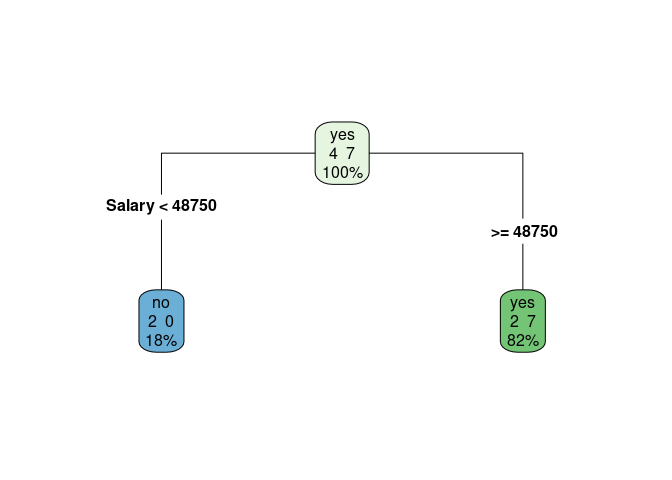

In [ ]:
control = rpart.control(minsplit=1,maxdepth=1)
model <- rpart(Purchased~Salary, data=train, method="class", control = control)
rpart.plot(model, type=4, extra=101, digits=-2)

#### Test With Testing Data

Here are the predictions for our test data:

In [ ]:
pred <- predict(model, newdata = test, type = 'class')
compare <- data.frame(actual=test, predictions=pred)
print(compare)

  actual.Salary actual.Age actual.Purchased predictions
1         53900         45              yes         yes
2         64800         49              yes         yes
3         50000         32               no         yes
4         55900         57              yes         yes
5         55600         29              yes         yes
6         60000         25               no         yes
7         80000         30              yes         yes
8         66000         62              yes         yes

Here is the confusion matrix:

In [ ]:
table(test$Purchased, pred)

     pred
      no yes
  no   0   2
  yes  0   6

Here is the accuracy:

In [ ]:
accuracy(test$Purchased, pred)

[1] 0.75

### Model Purchased\~Age

#### Model With Training Data

Lets look at the data sorted by Age:

In [ ]:
print(train[order(train$Age),])

   Salary Age Purchased
7   48600  26        no
5   69200  30       yes
10  69000  32       yes
9   45300  34        no
2   65300  37        no
1   53700  41        no
3   48900  45       yes
4   64800  49       yes
11  73200  52       yes
6   55900  57       yes
8   72000  60       yes

It appears that mostly older purchased

Lets look at the split on `Age`

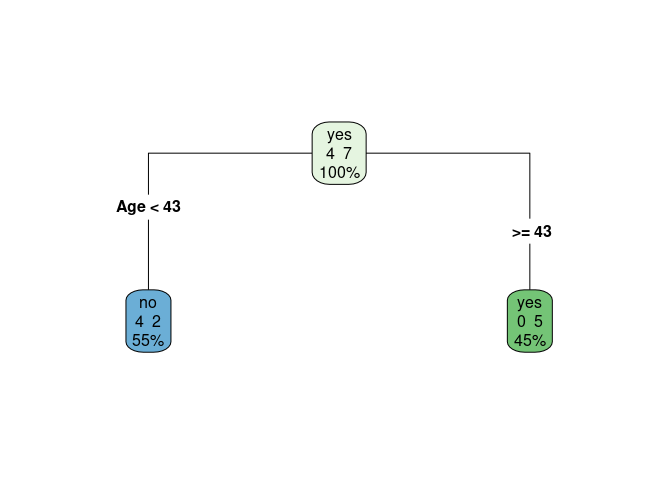

In [ ]:
control = rpart.control(minsplit=1,maxdepth=1)
model <- rpart(Purchased~Age, data=train, method="class", control = control)
rpart.plot(model, type=4, extra=101, digits=-2)

#### Test With Testing Data

Here are the predictions for our test data:

In [ ]:
pred <- predict(model, newdata = test, type = 'class')
compare <- data.frame(actual=test, predictions=pred)
print(compare)

  actual.Salary actual.Age actual.Purchased predictions
1         53900         45              yes         yes
2         64800         49              yes         yes
3         50000         32               no          no
4         55900         57              yes         yes
5         55600         29              yes          no
6         60000         25               no          no
7         80000         30              yes          no
8         66000         62              yes         yes

Here is the confusion matrix:

In [ ]:
table(test$Purchased, pred)

     pred
      no yes
  no   2   0
  yes  2   4

Here is the accuracy:

In [ ]:
accuracy(test$Purchased, pred)

[1] 0.75

### Model Purchased\~Salary grown out

#### Model With Training Data

How about if we grow the `Salary` tree even more?

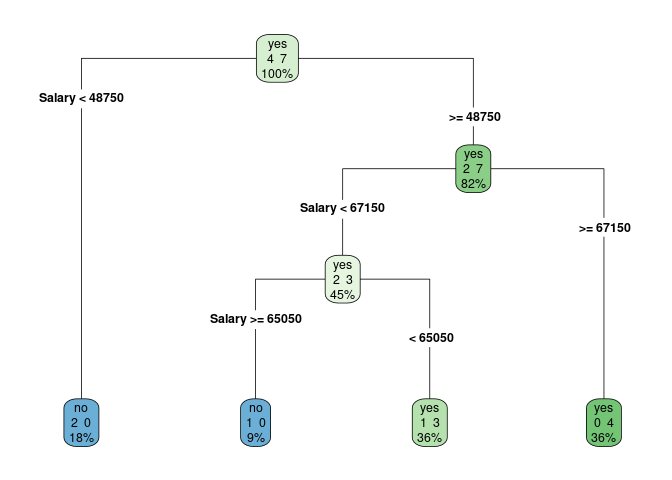

In [ ]:
control = rpart.control(minsplit=1,maxdepth=3, cp=-1)
model <- rpart(Purchased~Salary, data=train, method="class", control = control)
rpart.plot(model, type=4, extra=101, digits=-2)

#### Test With Testing Data

Here are the predictions for our test data:

In [ ]:
pred <- predict(model, newdata = test, type = 'class')
compare <- data.frame(actual=test, predictions=pred)
print(compare)

  actual.Salary actual.Age actual.Purchased predictions
1         53900         45              yes         yes
2         64800         49              yes         yes
3         50000         32               no         yes
4         55900         57              yes         yes
5         55600         29              yes         yes
6         60000         25               no         yes
7         80000         30              yes         yes
8         66000         62              yes          no

Here is the confusion matrix:

In [ ]:
table(test$Purchased, pred)

     pred
      no yes
  no   0   2
  yes  1   5

Here is the accuracy:

In [ ]:
accuracy(test$Purchased, pred)

[1] 0.625

### Model Purchased\~Salary grown Full Tree

#### Model With Training Data

How about all out with `Salary`:

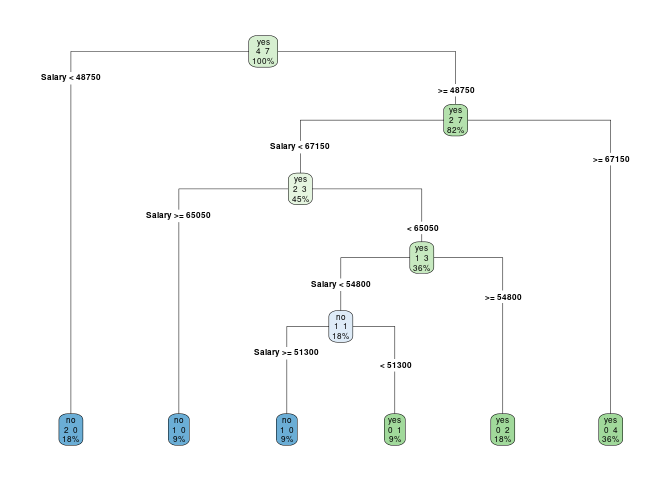

In [ ]:
control = rpart.control(minsplit=1)
model <- rpart(Purchased~Salary, data=train, method="class", control = control)
rpart.plot(model, type=4, extra=101, digits=-2)

#### Test With Testing Data

Here are the predictions for our test data:

In [ ]:
pred <- predict(model, newdata = test, type = 'class')
compare <- data.frame(actual=test, predictions=pred)
print(compare)

  actual.Salary actual.Age actual.Purchased predictions
1         53900         45              yes          no
2         64800         49              yes         yes
3         50000         32               no         yes
4         55900         57              yes         yes
5         55600         29              yes         yes
6         60000         25               no         yes
7         80000         30              yes         yes
8         66000         62              yes          no

Here is the confusion matrix:

In [ ]:
table(test$Purchased, pred)

     pred
      no yes
  no   0   2
  yes  2   4

Here is the accuracy:

In [ ]:
accuracy(test$Purchased, pred)

[1] 0.5

### Model 6 Purchased\~Salary+Age

#### Model With Training Data

Finally lets build a model that uses both Salary and Age:

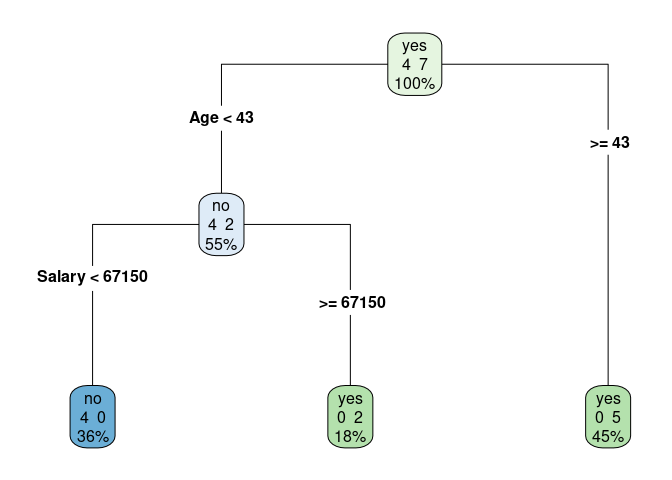

In [ ]:
control = rpart.control(minsplit=1)
model <- rpart(Purchased~Salary+Age, data=train, method="class", control = control)
rpart.plot(model, type=4, extra=101, digits=-2)

#### Test With Testing Data

Here are the predictions for our test data:

In [ ]:
pred <- predict(model, newdata = test, type = 'class')
compare <- data.frame(actual=test, predictions=pred)
print(compare)

  actual.Salary actual.Age actual.Purchased predictions
1         53900         45              yes         yes
2         64800         49              yes         yes
3         50000         32               no          no
4         55900         57              yes         yes
5         55600         29              yes          no
6         60000         25               no          no
7         80000         30              yes         yes
8         66000         62              yes         yes

Here is the confusion matrix:

In [ ]:
table(test$Purchased, pred)

     pred
      no yes
  no   2   0
  yes  1   5

Here is the accuracy:

In [ ]:
accuracy(test$Purchased, pred)

[1] 0.875